# DAEN 429 Midtern 1 Bonus Scratch Work
### Fletcher Newman | October 14th, 2025
Scratch work to find best models for midterm bonus

Cleaner functions and code with final model can be found in `midterm_model_clean.ipynb`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('BonusQuestionTrain.csv')
val_df = pd.read_csv('BonusQuestionVal.csv')

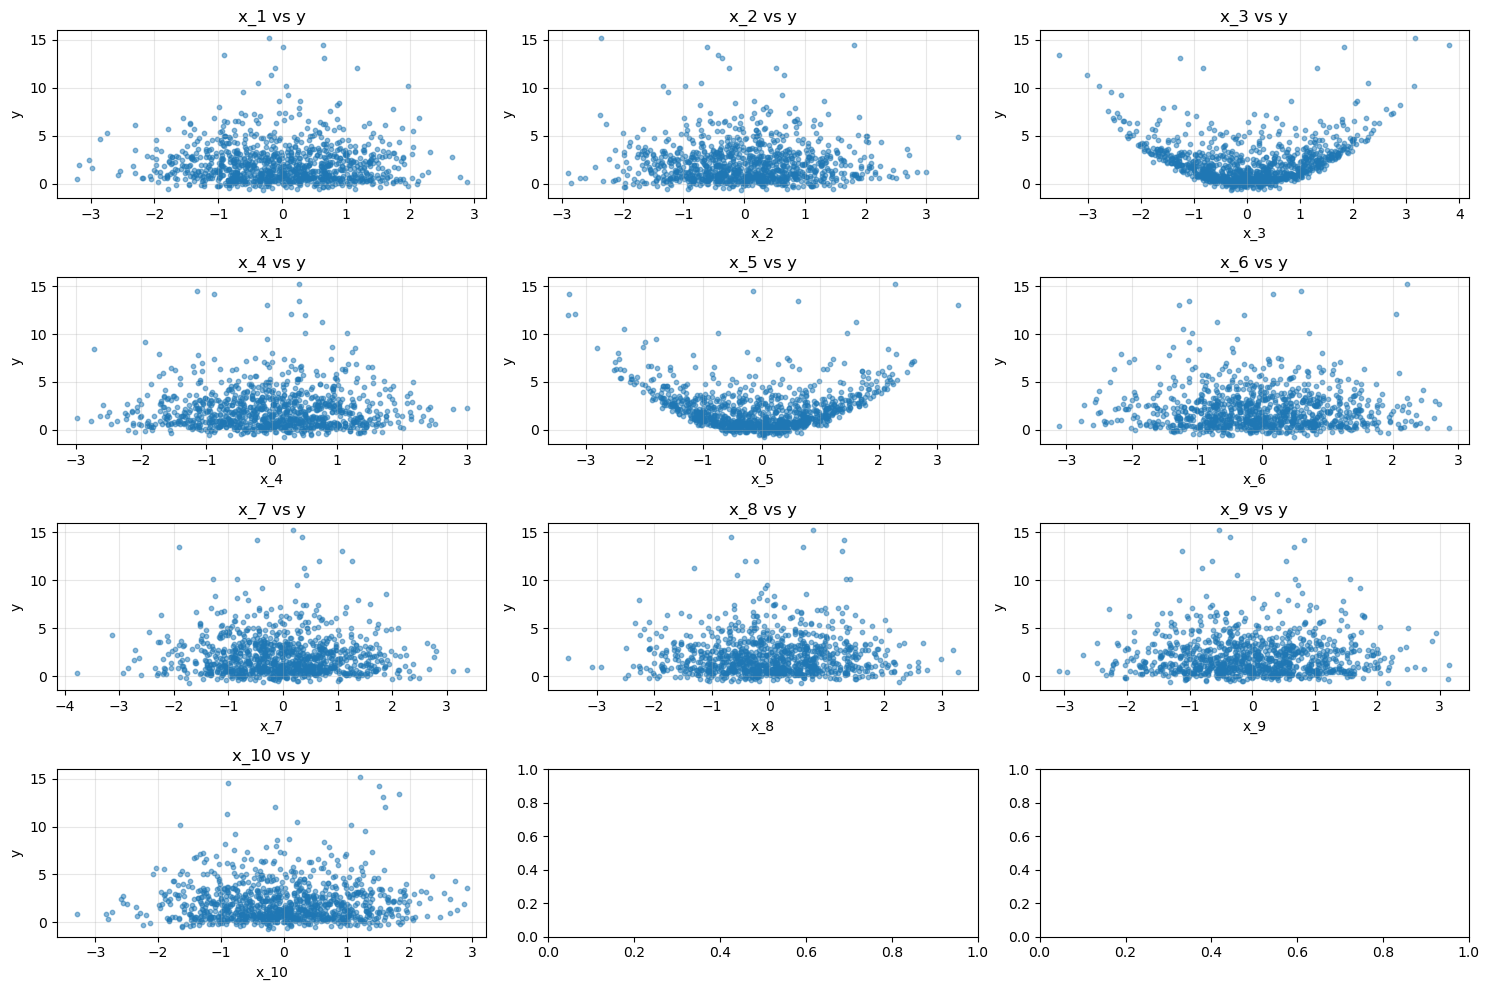

In [3]:
# Scatter plots to visualize relationships between features and target
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
feature_cols = [col for col in train_df.columns if col != 'y']

for idx, col in enumerate(feature_cols):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].scatter(train_df[col], train_df['y'], alpha=0.5, s=10)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('y')
    axes[row, col_idx].set_title(f'{col} vs y')
    axes[row, col_idx].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

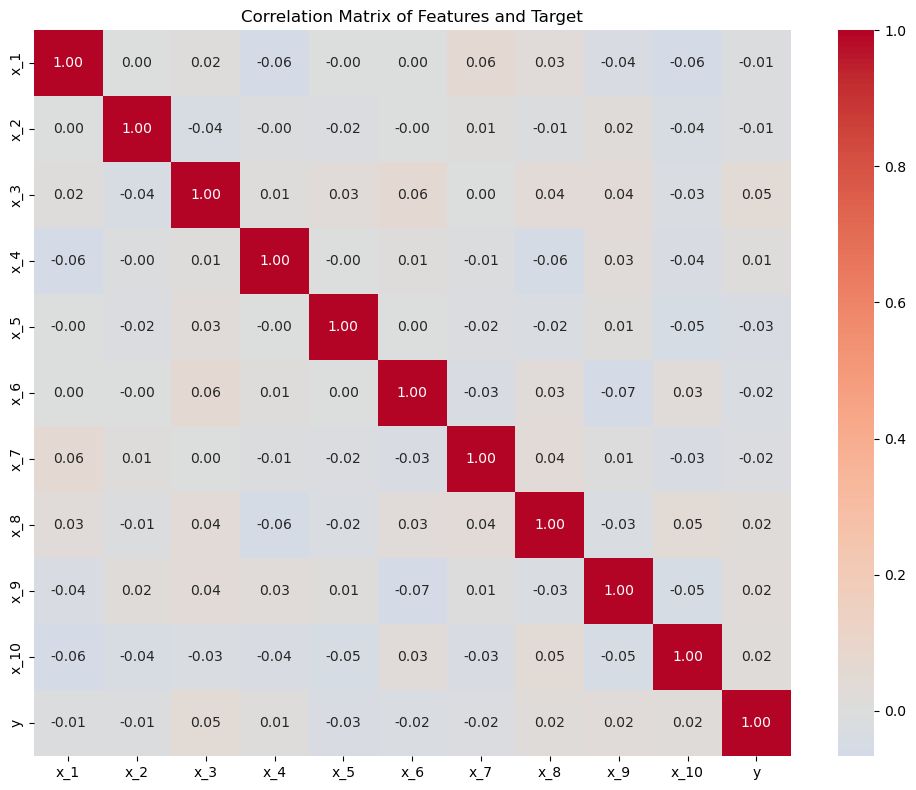


Correlation with target variable 'y':
y       1.000000
x_3     0.049399
x_9     0.024676
x_8     0.022575
x_10    0.022356
x_4     0.008638
x_2    -0.006477
x_1    -0.011092
x_7    -0.019321
x_6    -0.023493
x_5    -0.032617
Name: y, dtype: float64


In [4]:
# Correlation matrix for training data
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features and Target')
plt.tight_layout()
plt.show()

print("\nCorrelation with target variable 'y':")
print(correlation_matrix['y'].sort_values(ascending=False))

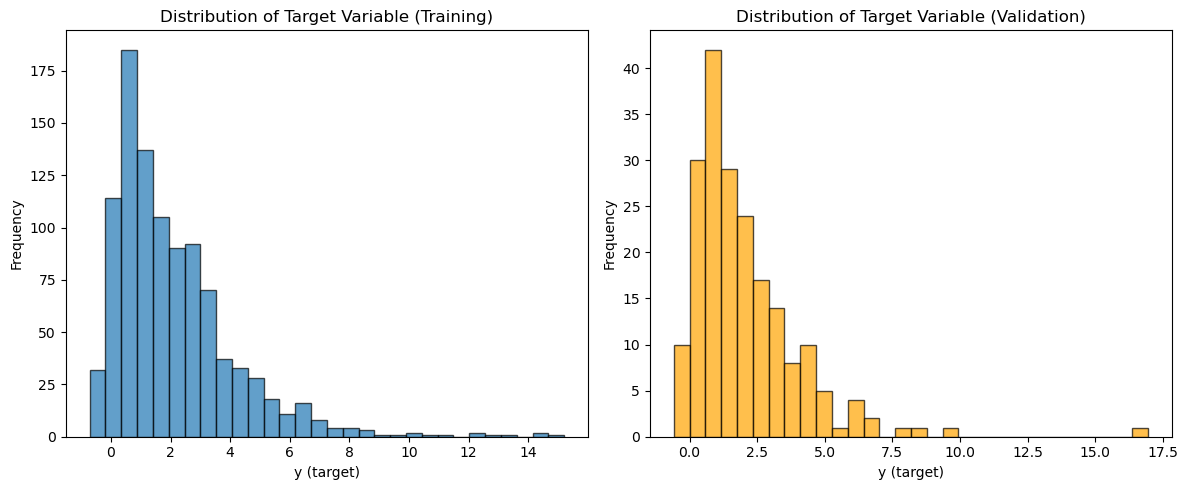

In [5]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['y'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('y (target)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Training)')

plt.subplot(1, 2, 2)
plt.hist(val_df['y'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('y (target)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Validation)')

plt.tight_layout()
plt.show()

In [11]:
# Import PyTorch for modeling
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from collections import OrderedDict

print(f"PyTorch version: {torch.__version__}")
print("Successfully imported PyTorch!")

PyTorch version: 2.2.2
Successfully imported PyTorch!


## Neural Network

- 3-layer with ReLU activation
- Dropout and L2 regularization 
- Batch normalization for stable training

In [12]:
# Data Preparation: Standardize features and convert to PyTorch tensors
import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_train = train_df.drop('y', axis=1).values
y_train = train_df['y'].values

X_val = val_df.drop('y', axis=1).values
y_val = val_df['y'].values

# Standardize features (important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)

X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val).reshape(-1, 1)

print(f"Training set: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Validation set: {X_val_tensor.shape}, {y_val_tensor.shape}")

Training set: torch.Size([1000, 10]), torch.Size([1000, 1])
Validation set: torch.Size([200, 10]), torch.Size([200, 1])


In [13]:
# Define Multi-Layer Neural Network with Regularization
class NeuralNetwork(nn.Module):
    """
    Multi-layer neural network for non-linear regression.
    
    Architecture:
    - Input layer: 10 features
    - Hidden layer 1: 128 neurons + BatchNorm + ReLU + Dropout
    - Hidden layer 2: 64 neurons + BatchNorm + ReLU + Dropout
    - Hidden layer 3: 32 neurons + BatchNorm + ReLU + Dropout
    - Output layer: 1 neuron (regression output)
    
    Regularization techniques:
    - Dropout (0.3): Randomly zeros some neurons during training to prevent overfitting
    - Batch Normalization: Normalizes layer inputs for stable training
    """
    def __init__(self, input_size=10, dropout_rate=0.3):
        super(NeuralNetwork, self).__init__()
        
        # Layer 1
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Layer 2
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Layer 3
        self.fc3 = nn.Linear(128, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(dropout_rate)

        # # Layer 4
        # self.fc4 = nn.Linear(64, 32)
        # self.bn4 = nn.BatchNorm1d(32)
        # self.dropout4 = nn.Dropout(dropout_rate)

        # # Layer 5
        # self.fc5 = nn.Linear(32, 16)
        # self.bn5 = nn.BatchNorm1d(16)
        # self.dropout5 = nn.Dropout(dropout_rate)
        
        # Output layer
        self.fc6 = nn.Linear(32, 1)
        
        # Activation function
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Layer 1
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        # Layer 2
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        # Layer 3
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)

        # # Layer 4
        # x = self.fc4(x)
        # x = self.bn4(x)
        # x = self.relu(x)
        # x = self.dropout4(x)

        # # Layer 5
        # x = self.fc5(x)
        # x = self.bn5(x)
        # x = self.relu(x)
        # x = self.dropout5(x)
        
        # Output layer (no activation for regression)
        x = self.fc6(x)
        
        return x

In [14]:
# Initialize the model
model = NeuralNetwork(input_size=10, dropout_rate=0.3)
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

# Training Configuration
# Loss function: Mean Squared Error (MSE) for regression
criterion = nn.MSELoss()

# Optimizer: Adam with weight decay (L2 regularization)
# Weight decay adds penalty for large weights, preventing overfitting
learning_rate = 0.001
weight_decay = 1e-5  # L2 regularization strength
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate scheduler: Reduces learning rate when validation loss plateaus
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)


# Training Loop
num_epochs = 100
batch_size = 32
patience = 10  
min_delta = 0.0001  
best_val_loss = float('inf')
epochs_without_improvement = 0
best_model_state = None

# Create data loaders for batch training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Track training and validation losses
train_losses = []
val_losses = []

print("Starting training...")
print(f"Epochs: {num_epochs}, Batch size: {batch_size}\n")

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode (enables dropout)
    epoch_train_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update weights

    # Compute training loss WITHOUT dropout (for fair comparison)
    model.eval()  # Disable dropout for evaluation
    with torch.no_grad():
        train_predictions = model(X_train_tensor)
        train_loss = criterion(train_predictions, y_train_tensor)
        train_losses.append(train_loss.item())

        # Validation 
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses.append(val_loss.item())
    
    # Update learning rate based on validation loss
    # scheduler.step(val_loss)

    
    # Early stopping check
    if val_loss.item() < best_val_loss - min_delta:
        # Validation loss improved
        best_val_loss = val_loss.item()
        epochs_without_improvement = 0
        # Save the best model state
        best_model_state = OrderedDict({k: v.clone() for k, v in model.state_dict().items()})
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f} ✓ (New best)")
    else:
        # No improvement
        epochs_without_improvement += 1
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f} (No improvement: {epochs_without_improvement}/{patience})")
        
        # Check if we should stop
        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs!")
            print(f"Best validation loss: {best_val_loss:.4f}")
            break

# Restore the best model
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print("\nRestored model to best validation loss state")

print("\nTraining completed!")
print(f"Final Training Loss: {train_losses[-1 - epochs_without_improvement]:.4f}")
print(f"Final Validation Loss: {val_losses[-1 - epochs_without_improvement]:.4f}")

NeuralNetwork(
  (fc1): Linear(in_features=10, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc6): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

Total parameters: 40705
Starting training...
Epochs: 100, Batch size: 32

Epoch [1/100] - Train Loss: 6.4659, Val Loss: 6.3543 ✓ (New best)
Epoch [2/100] - Train Loss: 4.1450, Val Loss: 4.1380 ✓ (New best)
Epoch [3/100] - Train Loss: 2.3996, Val Loss: 2.4589 ✓ (New best)
Epoch [4/100] - Train Loss: 1.4497, Val Loss: 1.4

In [15]:

def compute_loss(model, test):
    """
    Compute MSE loss on test data.
    
    Args:
        model: Trained PyTorch model
        test: pandas DataFrame with same format as training data
    
    Returns:
        None (prints the MSE loss)
    """
    # Extract features and target
    X_test = test.drop('y', axis=1).values
    y_test = test['y'].values
    
    # Standardize using the same scaler from training
    X_test_scaled = scaler.transform(X_test)
    
    # Convert to tensors
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)
    
    # Compute predictions
    model.eval()  # Set to evaluation mode
    with torch.no_grad():
        predictions = model(X_test_tensor)
        mse_loss = criterion(predictions, y_test_tensor)
    
    # Print MSE loss as required
    print(f"MSE Loss on test data: {mse_loss.item():.6f}")
    
    return mse_loss.item()

# Test the function on validation data
print("Testing compute_loss function on validation data:")
compute_loss(model, val_df)

Testing compute_loss function on validation data:
MSE Loss on test data: 0.324848


0.3248477280139923

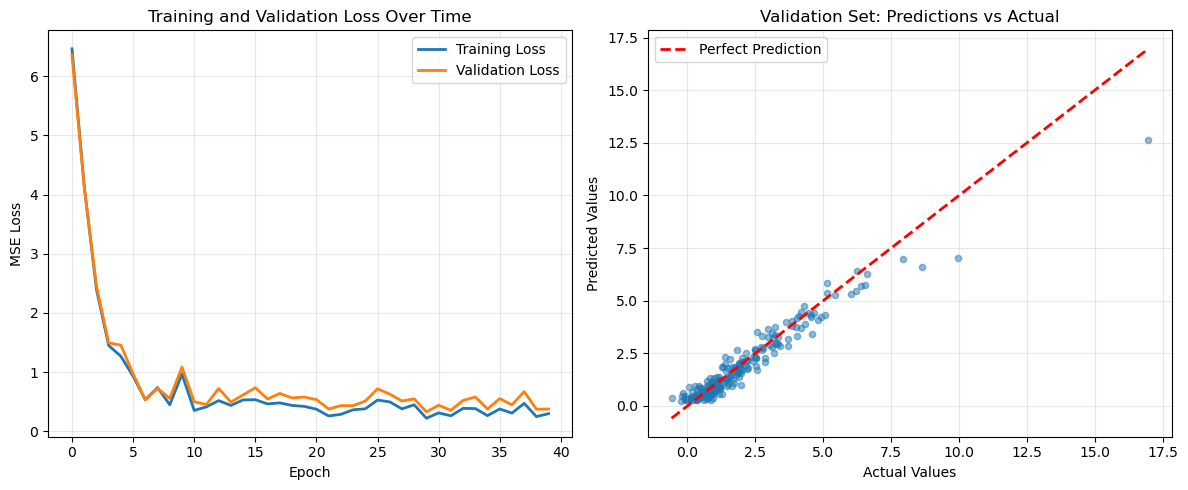


Validation R² Score: 0.9230


In [16]:
# Visualize Training Progress
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', linewidth=2)
plt.plot(val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot predictions vs actual values on validation set
plt.subplot(1, 2, 2)
model.eval()
with torch.no_grad():
    val_predictions = model(X_val_tensor).numpy()
plt.scatter(y_val, val_predictions, alpha=0.5, s=20)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Predictions vs Actual')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate R² score
from sklearn.metrics import r2_score
r2 = r2_score(y_val, val_predictions)
print(f"\nValidation R² Score: {r2:.4f}")

# Other Models
Going to try:
- XGBoost model
- Random Forest
- SVM

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [18]:
# Model selection function
def select_model(X, y):
    """Selecting between XGBoost, random forest, and SVM regressor models"""

    # Wierd problems with macOS and XGBoost
    import os
    os.environ['OMP_NUM_THREADS'] = '1'  # Limit OpenMP threads

    # # Just take sample of data so we don't overload the system
    # sample_size = 50000
    # sample_idx = np.random.choice(len(X), sample_size, replace=False)
    # X_sample, y_sample = X.iloc[sample_idx], y.iloc[sample_idx]
    X_sample, y_sample = X, y
    

    # init models
    # Gradient boosted tree
    xgb_model = xgb.XGBRegressor(eval_metric='rmse')
    xgb_params = {
        'max_depth': [3, 4, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 400, 600]
    }

    # Random forest
    rf_model = RandomForestRegressor()
    rf_params = {
        'n_estimators': [50, 100, 200, 300],
        'min_samples_split': [2, 5, 8, 10],
        'min_samples_leaf': [1, 2, 4, 6],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['sqrt', 'log2', 0.5]
    }

    # SVM (need to scale data for better performance)
    svm_model = SVR()
    scaler = StandardScaler()
    X_svm = scaler.fit_transform(X_sample)
    svm_params = {
        'C': [0.5, 1, 2, 4],        
        'kernel': ['rbf'],               
        'gamma': [0.01, 0.05, 0.1] 
    }

    models = [xgb_model, rf_model, svm_model]
    params = [xgb_params, rf_params, svm_params]
    model_names = ['XGB', 'RF', 'SVM']
    # Make sure initial score big negitive number (working with negitive MSE)
    best_score = -np.inf
    best_model = None
    best_model_name = None
    best_params = None


    for i in range(len(model_names)):
        print(f'Tuning {model_names[i]}...')
 
        
        param_search = RandomizedSearchCV(models[i], params[i], n_iter=12, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
        # param_search = GridSearchCV(models[i], params[i], cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


        # Make sure SVM fits with scaled data
        if model_names[i] == 'SVM':
            param_search.fit(X_svm, y_sample) 
        else:
            param_search.fit(X_sample, y_sample) 

        score = param_search.best_score_

        print(f'{model_names[i]} score: {-score}')
        print('-'*50)

        # This works because we are using the negitive MSE
        if score > best_score:
            best_score = score
            best_model = param_search.best_estimator_
            best_model_name = model_names[i]
            best_params = param_search.best_params_

    print('='*100)
    print(f'Best model was {best_model_name}')
    print(f'Score: {-best_score}')
    print(f'Best hyperparams: {best_params}')
    print('='*100)
    return best_model

In [19]:
X_ML = train_df.drop(columns=['y'])
y_ML = train_df['y']
best_ML_model = select_model(X_ML, y_ML)

Tuning XGB...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
XGB score: 0.46077635900758557
--------------------------------------------------
Tuning RF...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
RF score: 0.8147558573745237
--------------------------------------------------
Tuning SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM score: 0.4807587071079695
--------------------------------------------------
Best model was XGB
Score: 0.46077635900758557
Best hyperparams: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2}


# Final Model
The 3-layer neural net is better, so we will use that

Re-train model on all data (including validation)

In [20]:
# Define training function
def train_nn(model, train_df):
    """Trains neural net"""
    # Training Configuration
    # Loss function: Mean Squared Error (MSE) for regression
    criterion = nn.MSELoss()

    # Optimizer: Adam with weight decay (L2 regularization)
    # Weight decay adds penalty for large weights, preventing overfitting
    learning_rate = 0.001
    weight_decay = 1e-5  # L2 regularization strength
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Prepare data
    # Separate features and target
    X_train = train_df.drop('y', axis=1).values
    y_train = train_df['y'].values

    # Standardize features (important for neural networks!)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)

    # Training Loop
    num_epochs = 100
    batch_size = 32
    patience = 10  
    min_delta = 0.0001  
    best_train_loss = float('inf')
    epochs_without_improvement = 0
    best_model_state = None

    # Create data loaders for batch training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Track training and validation losses
    train_losses = []

    print("Starting training...")
    print(f"Epochs: {num_epochs}, Batch size: {batch_size}\n")

    for epoch in range(num_epochs):
        # Training phase
        model.train() 
        
        for batch_X, batch_y in train_loader:
            # Forward pass
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)
            
            # Backward pass and optimization
            optimizer.zero_grad()  # Clear previous gradients
            loss.backward()        # Compute gradients
            optimizer.step()       # Update weights

        # Compute training loss WITHOUT dropout (for fair comparison)
        model.eval()  # Disable dropout for evaluation
        with torch.no_grad():
            train_predictions = model(X_train_tensor)
            train_loss = criterion(train_predictions, y_train_tensor)
            train_losses.append(train_loss.item())

        
        # Early stopping check
        if train_loss.item() < best_train_loss - min_delta:
            # Validation loss improved
            best_train_loss = train_loss.item()
            epochs_without_improvement = 0
            # Save the best model state
            best_model_state = OrderedDict({k: v.clone() for k, v in model.state_dict().items()})
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss.item():.4f} ✓ (New best)")
        else:
            # No improvement
            epochs_without_improvement += 1
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss.item():.4f} (No improvement: {epochs_without_improvement}/{patience})")
            
            # Check if we should stop
            if epochs_without_improvement >= patience:
                print(f"\nEarly stopping triggered after {epoch+1} epochs!")
                print(f"Best train loss: {best_train_loss:.4f}")
                break

    # Restore the best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print("\nRestored model to best train loss state")

    print("\nTraining completed!")
    print(f"Final Training Loss: {train_losses[-1 - epochs_without_improvement]:.4f}")

    return model

In [21]:
# Initialize the model
model = NeuralNetwork(input_size=10, dropout_rate=0.3)

# Combine training and validation for more training data
mega_df = pd.concat([train_df, val_df], ignore_index=True)

# Train model
model = train_nn(model, train_df)

Starting training...
Epochs: 100, Batch size: 32

Epoch [1/100] - Train Loss: 5.1245 ✓ (New best)
Epoch [2/100] - Train Loss: 2.3424 ✓ (New best)
Epoch [3/100] - Train Loss: 1.3343 ✓ (New best)
Epoch [4/100] - Train Loss: 0.8612 ✓ (New best)
Epoch [5/100] - Train Loss: 0.6312 ✓ (New best)
Epoch [6/100] - Train Loss: 0.7566 (No improvement: 1/10)
Epoch [7/100] - Train Loss: 0.6575 (No improvement: 2/10)
Epoch [8/100] - Train Loss: 0.6825 (No improvement: 3/10)
Epoch [9/100] - Train Loss: 0.6513 (No improvement: 4/10)
Epoch [10/100] - Train Loss: 0.4729 ✓ (New best)
Epoch [11/100] - Train Loss: 0.6143 (No improvement: 1/10)
Epoch [12/100] - Train Loss: 0.4880 (No improvement: 2/10)
Epoch [13/100] - Train Loss: 0.6861 (No improvement: 3/10)
Epoch [14/100] - Train Loss: 0.2840 ✓ (New best)
Epoch [15/100] - Train Loss: 0.5901 (No improvement: 1/10)
Epoch [16/100] - Train Loss: 0.3187 (No improvement: 2/10)
Epoch [17/100] - Train Loss: 0.4285 (No improvement: 3/10)
Epoch [18/100] - Train Los

In [22]:
# Output predictions 